# Visualization with hierarchical clustering and t-SNE

Learn about two unsupervised learning techniques for data visualization, hierarchical clustering and t-SNE. Hierarchical clustering merges the data samples into ever-coarser clusters, yielding a tree visualization of the resulting cluster hierarchy. t-SNE maps the data samples into 2d space so that the proximity of the samples to one another can be visualized.

In [22]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE

In [32]:
#load dataset as array
seeds = pd.read_csv('./datasets/grains/seeds.csv', header=None)
seeds[7] = seeds[7].map({1:'Kama wheat', 2:'Rosa wheat', 3:'Canadian wheat'})
seeds.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


In [18]:
#Create arrays from the dataframe
samples = seeds.iloc[:,:-1].values
varieties = seeds.iloc[:,-1].values

### Hierarchical clustering of the grain data
_SciPy linkage()_ function performs hierarchical clustering on an array of samples. Use the _linkage()_ function to obtain a hierarchical clustering of the grain samples, and use _dendrogram()_ to visualize the result. A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.

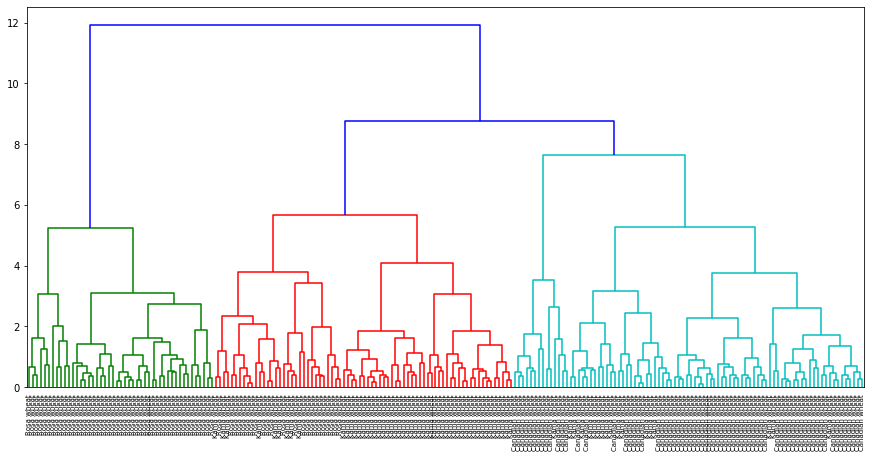

In [19]:
# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(15,7))
dendrogram(mergings,
          labels=varieties,
          leaf_font_size=7,
          leaf_rotation=90)

plt.show()

### Hierarchies of stocks
Perform hierarchical clustering of the companies. 
SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

In [33]:
#load stock dataset
stock = pd.read_csv('./datasets/company-stock-movements-2010-2015-incl.csv' )
stock.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [6]:
# create movement array
movements = stock.iloc[:,1:].values
companies = stock.iloc[:, 0].values

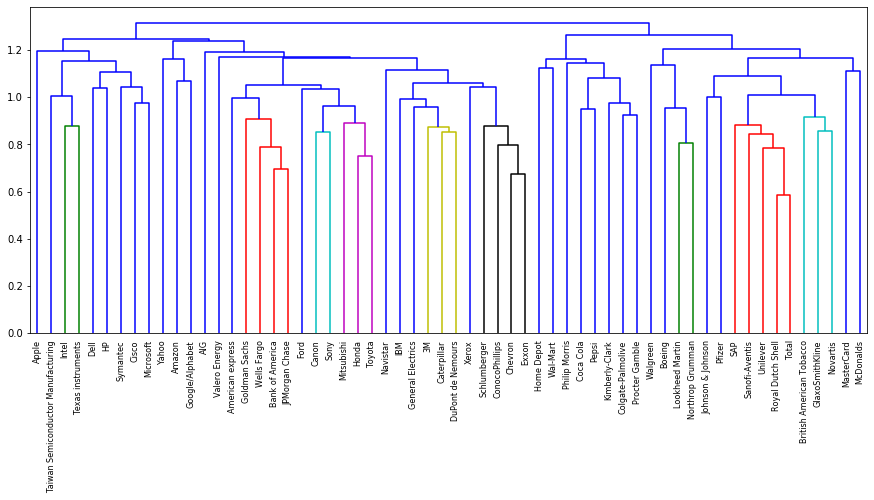

In [15]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
s_mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
plt.figure(figsize=(15, 6))
dendrogram(
    s_mergings,
    labels=companies,
    leaf_rotation=90,
    leaf_font_size=8
)
plt.show()


### Different linkage, different hierarchical clustering!
Perform a hierarchical clustering of the voting countries with 'single' linkage

In [34]:
#load dataset
eurovision = pd.read_csv('./datasets/eurovision-2016.csv')
eurovision.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [9]:
#create arrays
e_samples = eurovision.iloc[:, 2:7].values[:50]
country_names = eurovision.iloc[:, 1].values[:50]

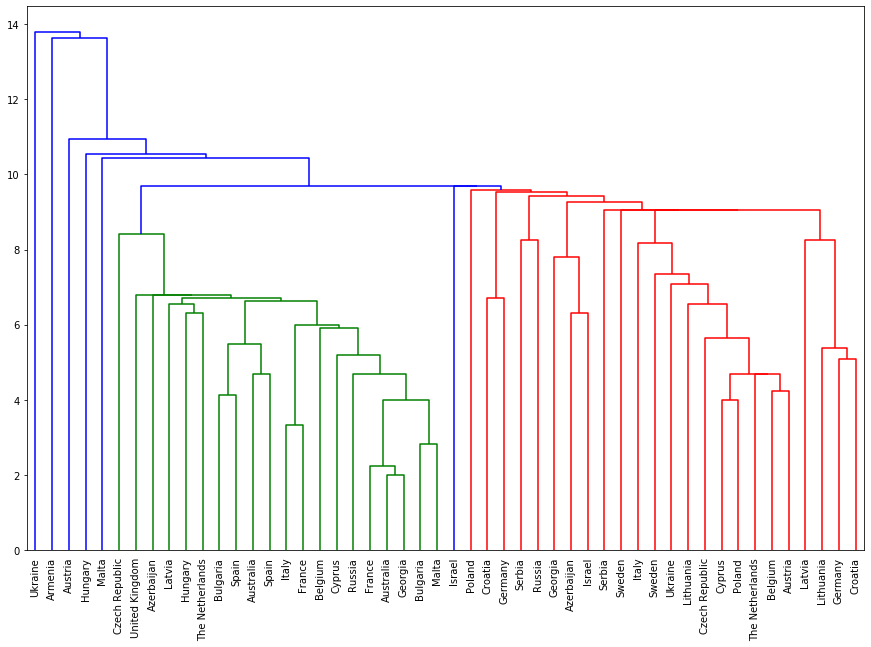

In [10]:
# Calculate the linkage: mergings
e_mergings = linkage(e_samples, method='single')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(
    e_mergings,
    labels=country_names,
    leaf_rotation=90,
    leaf_font_size=10
    )
plt.show()


### Extracting the cluster labels
Intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

In [20]:
# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          47
2                       0          52          23
3                      13           1           0
4                      57          17           0


### t-SNE visualization of grain dataset
Apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. 

In [35]:
#load dataset as array
seeds = pd.read_csv('./datasets/grains/seeds.csv', header=None)

#create arrays
samples = seeds.iloc[:,:-1].values
variety_numbers = seeds.iloc[:,-1].values

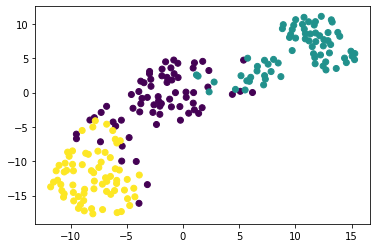

In [23]:
# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys, c=variety_numbers)
plt.show()

### A t-SNE map of the stock market
t-SNE provides great visualizations when the individual samples can be labeled. Apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market!

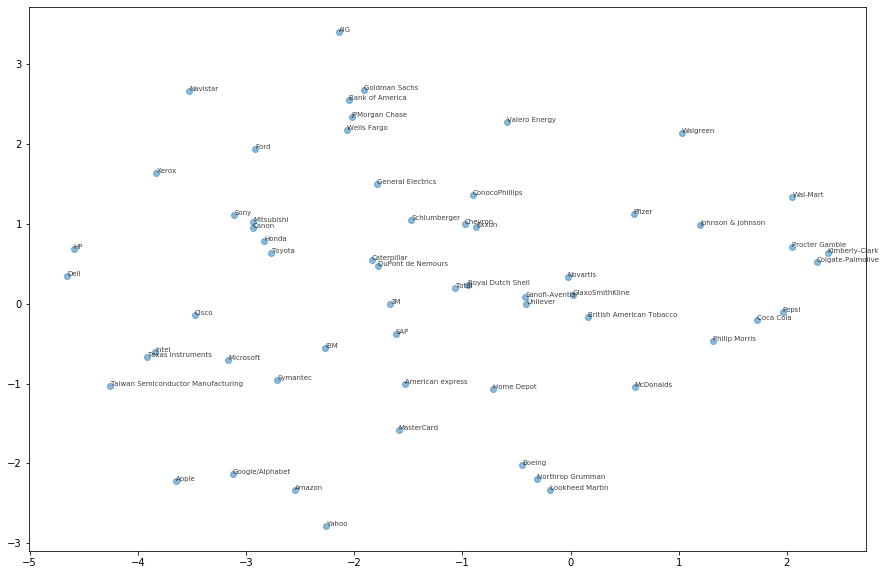

In [31]:
# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.figure(figsize=(15,10))
plt.scatter(xs,ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=7, alpha=0.75)
plt.show()
